In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
from helper import laplace_solution, plot_3d

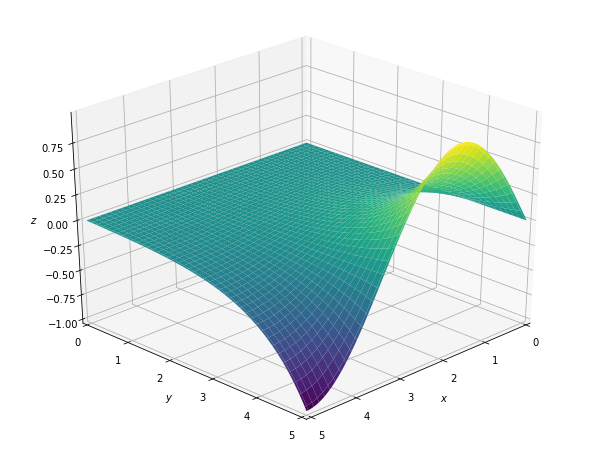

In [3]:
nx, ny = 128, 128
Lx, Ly = 5.0, 5.0
dx = Lx / (nx - 1)
dy = Ly / (ny - 1)

x = numpy.linspace(0.0, Lx, num=nx)
y = numpy.linspace(0.0, Ly, num=ny)

p_exact = laplace_solution(x, y, Lx, Ly)
plot_3d(x, y, p_exact)

In [20]:
def laplace2d_jacobi(p0, maxiter=20000, rtol=1e-6):
    p = p0.copy()
    ite = 0
    rdiff = rtol + 1.0
    conv = []
    while rdiff > rtol and ite < maxiter:
        pn = p.copy()
        p[1:-1, 1:-1] = 0.25 * (pn[:-2, 1:-1] + pn[1:-1, -2] + pn[1:-1, 2:] + pn[2:, 1:-1])
        p[1:-1, -1] = 0.25 * (pn[:-2, -1] + 2 * pn[1:-1, -2] + pn[2:, -1]) #for rhs boundary condition
        rdiff = numpy.sqrt(numpy.sum((p - pn)**2) / numpy.sum(pn**2))
        conv.append(rdiff)
        ite +=1
    return p, ite, conv

In [21]:
p0 = numpy.zeros((ny, nx))
p0[-1, :] = numpy.sin(1.5 * numpy.pi * x / Lx)

In [22]:
%%time
p, ites, conv = laplace2d_jacobi(p0, rtol=1e-8)
print(ites, conv[-1])

173 9.445276591442764e-09
CPU times: user 45.9 ms, sys: 2.36 ms, total: 48.3 ms
Wall time: 47.4 ms


In [23]:
def laplace2d_jacobi_2(p0, maxiter=20000, rtol=1e-6):
    p = p0.copy()
    ite = 0
    rdiff = rtol + 1.0
    conv = []
    while rdiff > rtol and ite < maxiter:
        pn = p.copy()
        for j in range(1, ny - 1):
            for i in range(1, nx - 1):
                p[j, i] = 0.25 * (pn[j-1, i] + pn[j, i-1] + pn[j, i+1] + pn[j+1, i])
        for j in range(1, ny - 1):
            p[j, -1] = 0.25 * (pn[j-1, -1] + 2 * pn[j, -2] + pn[j+1, -1]) #for rhs boundary condition
        rdiff = numpy.sqrt(numpy.sum((p - pn)**2) / numpy.sum(pn**2))
        conv.append(rdiff)
        ite +=1
    return p, ite, conv

In [24]:
%%time
p, ites, conv = laplace2d_jacobi(p0, maxiter=500)
print(ites, conv[-1])

126 9.75546001237916e-07
CPU times: user 38 ms, sys: 2.61 ms, total: 40.6 ms
Wall time: 39.9 ms


In [25]:
%%time
p, ites, conv = laplace2d_jacobi_2(p0, maxiter=500)
print(ites, conv[-1])

500 0.0006563967693368483
CPU times: user 8.46 s, sys: 21.8 ms, total: 8.48 s
Wall time: 8.53 s


In [26]:
def laplace2d_gauss_seidel(p0, maxiter=20000, rtol=1e-6):
    p = p0.copy()
    ite = 0
    rdiff = rtol + 1.0
    conv = []
    while rdiff > rtol and ite < maxiter:
        pn = p.copy()
        for j in range(1, ny - 1):
            for i in range(1, nx - 1):
                p[j, i] = 0.25 * (p[j-1, i] + p[j, i-1] + pn[j, i+1] + pn[j+1, i])
        for j in range(1, ny - 1):
            p[j, -1] = 0.25 * (p[j-1, -1] + 2 * p[j, -2] + p[j+1, -1]) #for rhs boundary condition
        rdiff = numpy.sqrt(numpy.sum((p - pn)**2) / numpy.sum(pn**2))
        conv.append(rdiff)
        ite +=1
    return p, ite, conv

In [27]:
%%time
p, ites, conv = laplace2d_gauss_seidel(p0, maxiter=500)
print(ites, conv[-1])

500 0.0005920237170650376
CPU times: user 9.22 s, sys: 37.1 ms, total: 9.26 s
Wall time: 9.57 s


In [28]:
%%time
p, ites, conv = laplace2d_jacobi_2(p0, maxiter=500)
print(ites, conv[-1])

500 0.0006563967693368483
CPU times: user 8.51 s, sys: 24.8 ms, total: 8.54 s
Wall time: 8.58 s


In [29]:
import numba

In [30]:
from numba import jit

In [31]:
def fib(n):
    a, b = 1,1
    for i in range(n-2):
        a,b=b,a+b
    return b

In [36]:
%%timeit
fib(500000)

3.17 s ± 23.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [37]:
@jit
def fib(n):
    a, b = 1,1
    for i in range(n-2):
        a,b=b,a+b
    return b

In [38]:
%%timeit
fib(500000)

278 µs ± 13.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [39]:
@jit
def laplace2d_jacobi_jit(p0, maxiter=20000, rtol=1e-6):
    p = p0.copy()
    ite = 0
    rdiff = rtol + 1.0
    conv = []
    while rdiff > rtol and ite < maxiter:
        pn = p.copy()
        for j in range(1, ny - 1):
            for i in range(1, nx - 1):
                p[j, i] = 0.25 * (pn[j-1, i] + pn[j, i-1] + pn[j, i+1] + pn[j+1, i])
        for j in range(1, ny - 1):
            p[j, -1] = 0.25 * (pn[j-1, -1] + 2 * pn[j, -2] + pn[j+1, -1]) #for rhs boundary condition
        rdiff = numpy.sqrt(numpy.sum((p - pn)**2) / numpy.sum(pn**2))
        conv.append(rdiff)
        ite +=1
    return p, ite, conv

In [43]:
%%timeit
p, ites, conv = laplace2d_jacobi_jit(p0, maxiter=100)

7.46 ms ± 65.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [44]:
%%timeit
p, ites, conv = laplace2d_jacobi_2(p0, maxiter=100)

1.69 s ± 41.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [46]:
%%timeit
p, ites, conv = laplace2d_jacobi(p0, maxiter=100)

21.3 ms ± 1.32 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [47]:
@jit
def laplace2d_gauss_seidel_jit(p0, maxiter=20000, rtol=1e-6):
    p = p0.copy()
    ite = 0
    rdiff = rtol + 1.0
    conv = []
    while rdiff > rtol and ite < maxiter:
        pn = p.copy()
        for j in range(1, ny - 1):
            for i in range(1, nx - 1):
                p[j, i] = 0.25 * (p[j-1, i] + p[j, i-1] + pn[j, i+1] + pn[j+1, i])
        for j in range(1, ny - 1):
            p[j, -1] = 0.25 * (p[j-1, -1] + 2 * p[j, -2] + p[j+1, -1]) #for rhs boundary condition
        rdiff = numpy.sqrt(numpy.sum((p - pn)**2) / numpy.sum(pn**2))
        conv.append(rdiff)
        ite +=1
    return p, ite, conv

In [49]:
%%timeit
p, ites, conv = laplace2d_gauss_seidel_jit(p0, maxiter=500)

70.2 ms ± 1.44 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [50]:
p, ites, conv = laplace2d_jacobi_jit(p0, rtol=1e-8)
print('jacobi', ites, conv[-1])
p, ites, conv = laplace2d_gauss_seidel_jit(p0, rtol=1e-8)
print('seidel', ites, conv[-1])

jacobi 19993 9.998616841620493e-09
seidel 13939 9.997635652451572e-09


In [51]:
@jit
def laplace2d_sor_jit(p0, omega, maxiter=20000, rtol=1e-6):
    p = p0.copy()
    ny, nx = p.shape
    ite = 0
    rdiff = rtol + 1
    conv = []
    while rdiff > rtol and ite < maxiter:
        pn = p.copy()
        for j in range(1,ny-1):
            for i in range(1, nx-1):
                p[j,i] = ((1 - omega) * pn[j,i] +
                          omega * 0.25 * (p[j - 1, i] +
                                          p[j, i - 1] +
                                          pn[j, i + 1] +
                                          pn[j + 1, i]))
                
        for j in range(1, ny - 1):
            p[j, -1] = 0.25 * (p[j - 1, -1] + 2*p[j, -2] + p[j+1, -1])
        rdiff = numpy.sqrt(numpy.sum((p-pn)**2) / numpy.sum(pn**2))
        conv.append(rdiff)
        ite += 1
    return p, ite, conv

In [64]:
p, ites, conv = laplace2d_sor_jit(p0, 1.0, rtol=1e-8)
print('omega = 1.0    ',  ites, '', conv[-1])
p, ites, conv = laplace2d_sor_jit(p0, 1.5, rtol=1e-8)
print('omega = 1.5     ', ites, '', conv[-1])
p, ites, conv = laplace2d_sor_jit(p0, (2 / (1 + (numpy.pi / nx))), rtol=1e-8)
print('omega = magic   ', ites, '', conv[-1])

omega = 1.0     13939  9.997635652451572e-09
omega = 1.5      7108  9.991011449593865e-09
omega = magic    1110  9.964283900168234e-09


magic omega = 2 / (1 + (pi / nx))